## データ収集



1.   データ項目

・球団(NPB12球団)

・年度(2020年度～2024年度)

・本塁打数

・試合数(2020年度のみ短縮シーズのため120試合,それ以外143試合)

・長打率

・出塁率



2.   データ収集方法

NPB公式サイトを利用し年度別チーム打撃成績を参考にした.

https://npb.jp/bis/2024/stats/tmb_c.html

https://npb.jp/bis/2023/stats/tmb_c.html

https://npb.jp/bis/2022/stats/tmb_c.html

https://npb.jp/bis/2021/stats/tmb_c.html

https://npb.jp/bis/2020/stats/tmb_c.html

https://npb.jp/bis/2024/stats/tmb_p.html

https://npb.jp/bis/2023/stats/tmb_p.html

https://npb.jp/bis/2022/stats/tmb_p.html

https://npb.jp/bis/2021/stats/tmb_p.html

https://npb.jp/bis/2020/stats/tmb_p.html



### 収集したデータを一覧で示す

In [91]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/studying_for_research/baseball/npb_2020_2024_hr.csv")
#display(df)

## データ整形

データ整形を以下の流れで行う.

1. CSVを読み込む
2. OPS(出塁率+長打率)を計算して列を追加
3. 年度ごとに集計(12球団合計)

- 本塁打数,試合数は「合計」
- OPS・長打率・出塁率は「平均」



In [92]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd

# データ読み込み
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/studying_for_research/baseball/npb_2020_2024_hr.csv")

# OPSを追加
df["OPS"] = df["出塁率"] + df["長打率"]

# 年度ごとに集計
yearly = df.groupby("年度").agg({
    "本塁打数": "sum",
    "試合数": "sum",
    "長打率": "mean",
    "出塁率": "mean",
    "OPS": "mean"
}).reset_index()

# 1試合平均HR数を計算
yearly["HR_per_game"] = yearly["本塁打数"] / yearly["試合数"]

# 結果を確認
display(yearly)

# CSVに保存
yearly.to_csv("npb_2020_2024_summary.csv", index=False)


,年度,本塁打数,試合数,長打率,出塁率,OPS,HR_per_game
0,2020,1288,1440,0.383750,0.324500,0.708250,0.894444
1,2021,1449,1716,0.375083,0.315000,0.690083,0.844406
2,2022,1304,1716,0.364417,0.308417,0.672833,0.759907
3,2023,1250,1716,0.358167,0.307417,0.665583,0.728438
4,2024,975,1716,0.343583,0.303333,0.646917,0.568182


## 可視化

1. HR_per_gameの推移を折れ線グラフで表示
2. OPSや長打率も合わせて折れ線にすると「飛ばない傾向との関係」が見えやすい


### 単体グラフ(HR_per_gaem)

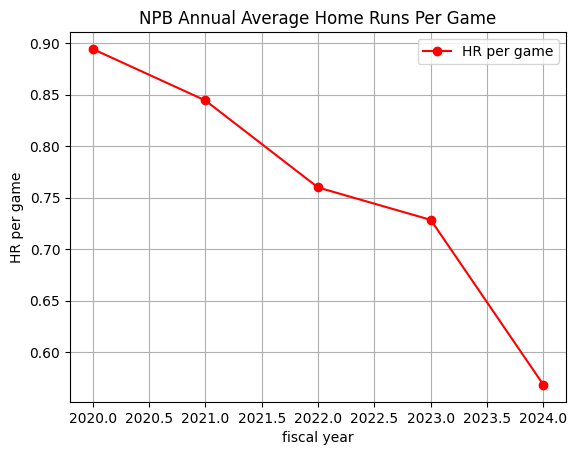

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# 整形済みデータを読み込み
yearly = pd.read_csv("npb_2020_2024_summary.csv")

# HR_per_game の推移
plt.plot(yearly["年度"], yearly["HR_per_game"], marker="o", color="red", label="HR per game")
plt.title("NPB Annual Average Home Runs Per Game")
plt.xlabel("fiscal year")
plt.ylabel("HR per game")
plt.legend()
plt.grid(True)
plt.show()


### 単体グラフ(OPS)


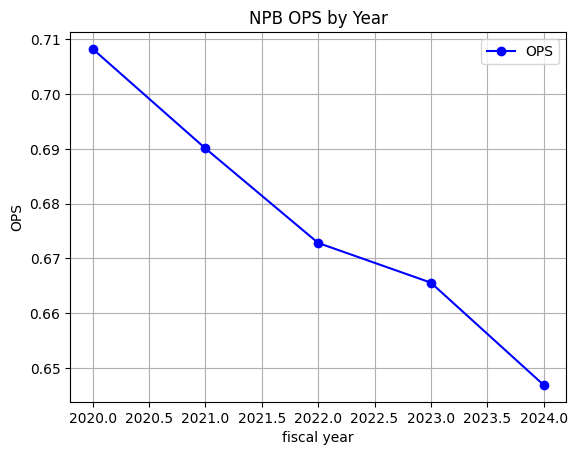

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Set font to support Japanese characters
mpl.rcParams['font.family'] = 'DejaVu Sans' # Or a font you have installed like 'IPAexGothic'

# 整形済みデータを読み込み
yearly = pd.read_csv("npb_2020_2024_summary.csv")

# OPS の推移
plt.plot(yearly["年度"], yearly["OPS"], marker="o", color="blue", label="OPS")
plt.title("NPB OPS by Year")
plt.xlabel("fiscal year")
plt.ylabel("OPS")
plt.legend()
plt.grid(True)
plt.show()

### 単体グラフ(SLG)

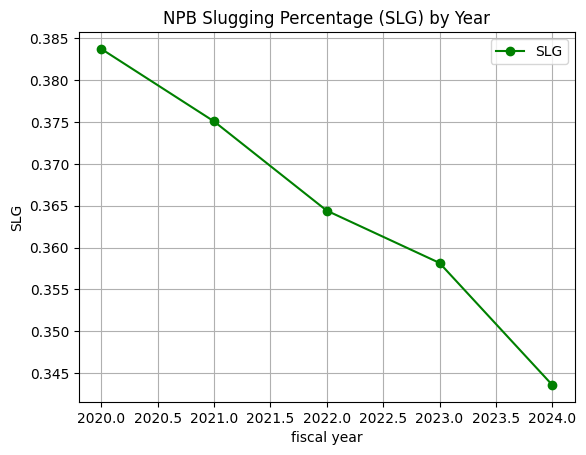

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

mpl.rcParams['font.family'] = 'DejaVu Sans'

# 整形済みデータを読み込み
yearly = pd.read_csv("npb_2020_2024_summary.csv")

# 長打率 (SLG) の推移
plt.plot(yearly["年度"], yearly["長打率"], marker="o", color="green", label="SLG")
plt.title("NPB Slugging Percentage (SLG) by Year")
plt.xlabel("fiscal year")
plt.ylabel("SLG")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
!apt-get update -qq && apt-get install fonts-japanese-gothic -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'fonts-japanese-gothic' has no installation candidate


### HR_per_gaemとOPSの2軸

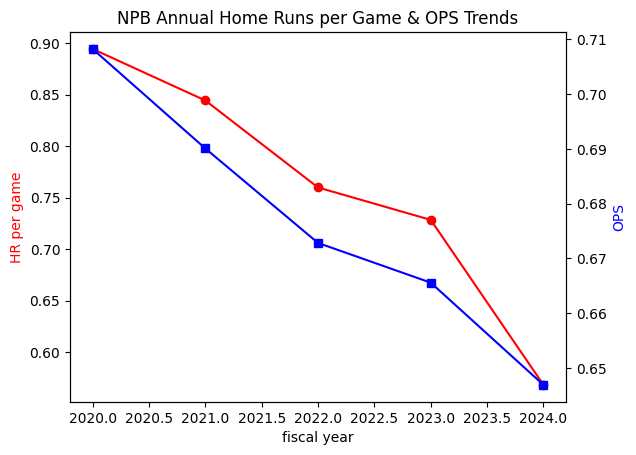

In [98]:
fig, ax1 = plt.subplots()

# 左軸：HR_per_game
ax1.plot(yearly["年度"], yearly["HR_per_game"], marker="o", color="red", label="HR per game")
ax1.set_xlabel("fiscal year")
ax1.set_ylabel("HR per game", color="red")

# 右軸：OPS
ax2 = ax1.twinx()
ax2.plot(yearly["年度"], yearly["OPS"], marker="s", color="blue", label="OPS")
ax2.set_ylabel("OPS", color="blue")

plt.title("NPB Annual Home Runs per Game & OPS Trends")
plt.show()


### 長打率(SLG)と出塁率(OBP)の推移

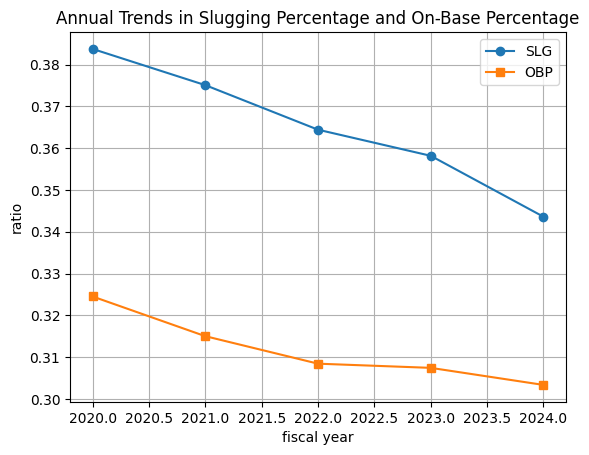

In [99]:
plt.plot(yearly["年度"], yearly["長打率"], marker="o", label="SLG")
plt.plot(yearly["年度"], yearly["出塁率"], marker="s", label="OBP")
plt.title("Annual Trends in Slugging Percentage and On-Base Percentage")
plt.xlabel("fiscal year")
plt.ylabel("ratio")
plt.legend()
plt.grid(True)
plt.show()


### OPS, SLG を計算

In [100]:
import pandas as pd

# OPSを計算（まだ列がない場合）
if "OPS" not in df.columns:
    df["OPS"] = df["出塁率"] + df["長打率"]


display(df[["年度", "OPS", "長打率"]].head())

,年度,OPS,長打率
0,2024,0.658,0.349
1,2024,0.641,0.327
2,2024,0.688,0.375
3,2024,0.601,0.315
4,2024,0.660,0.349


### HR_per_gameとOPSの散布図


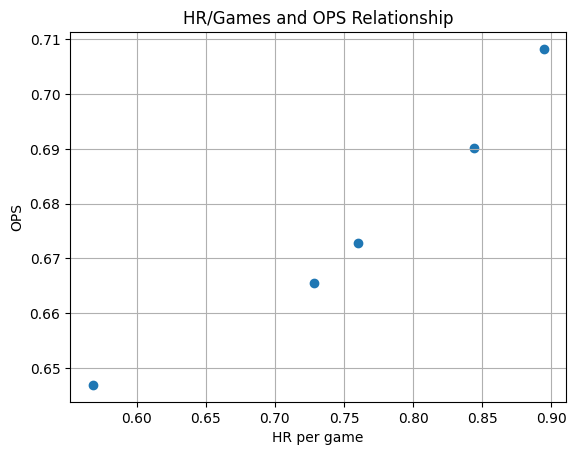

In [101]:
plt.scatter(yearly["HR_per_game"], yearly["OPS"])
plt.xlabel("HR per game")
plt.ylabel("OPS")
plt.title("HR/Games and OPS Relationship")
plt.grid(True)
plt.show()


### 年度ごとの棒グラフ(HR_per_game)

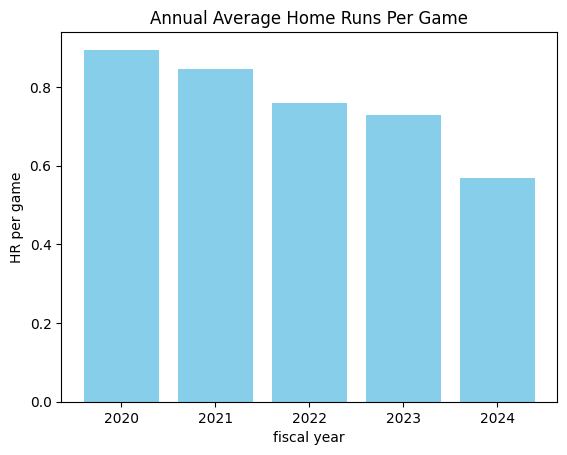

In [102]:
plt.bar(yearly["年度"], yearly["HR_per_game"], color="skyblue")
plt.title("Annual Average Home Runs Per Game")
plt.xlabel("fiscal year")
plt.ylabel("HR per game")
plt.show()


### 年度×チームの折れ線グラフ


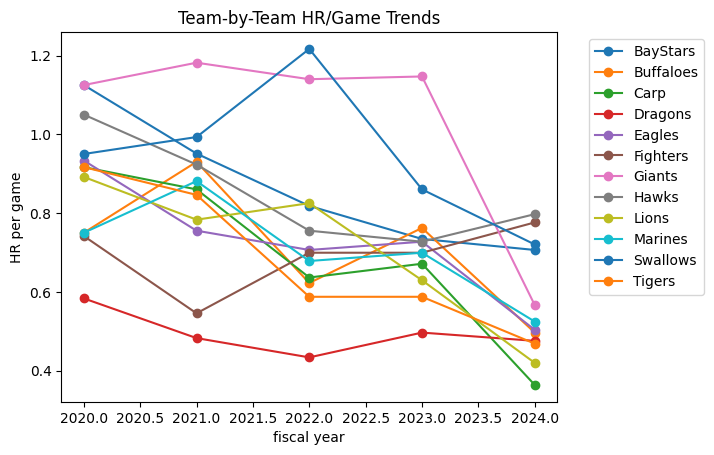

In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set font to support Japanese characters
#mpl.rcParams['font.family'] = 'IPAexGothic'

for team, group in df.groupby("球団"):
    plt.plot(group["年度"], group["本塁打数"] / group["試合数"], marker="o", label=team)

plt.title("Team-by-Team HR/Game Trends")
plt.xlabel("fiscal year")
plt.ylabel("HR per game")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### 年度ごとのチーム比較(棒グラフ)

/tmp/ipython-input-2735093267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="球団", y="HR_per_game", data=subset, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22243 (\N{CJK UNIFIED IDEOGRAPH-56E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


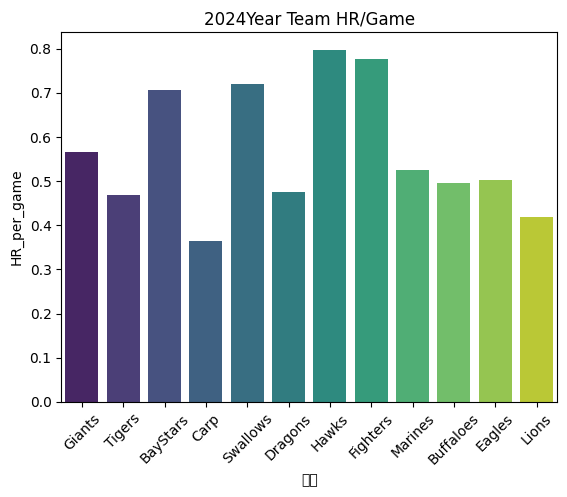

In [104]:
import seaborn as sns

year = 2024  # 任意の年度
subset = df[df["年度"] == year].copy()
subset["HR_per_game"] = subset["本塁打数"] / subset["試合数"]

sns.barplot(x="球団", y="HR_per_game", data=subset, palette="viridis")
plt.title(f"{year}Year Team HR/Game")
plt.xticks(rotation=45)
plt.show()


### チームごとのOPSとHRの関係(散布図)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22593 (\N{CJK UNIFIED IDEOGRAPH-5841}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22243 (\N{CJK UNIFIED IDEOGRAPH-56E3}) missing from font(s) DejaVu Sans.
  fig.canvas

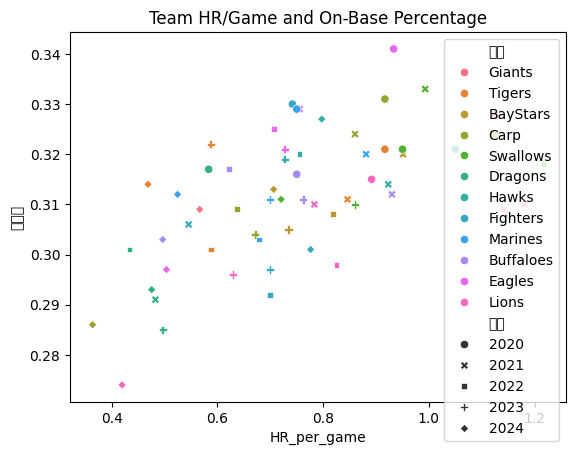

In [105]:
df["HR_per_game"] = df["本塁打数"] / df["試合数"]

sns.scatterplot(x="HR_per_game", y="出塁率", hue="球団", style="年度", data=df)
plt.title("Team HR/Game and On-Base Percentage")
plt.show()


### ヒートマップ(年度×チーム)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22243 (\N{CJK UNIFIED IDEOGRAPH-56E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


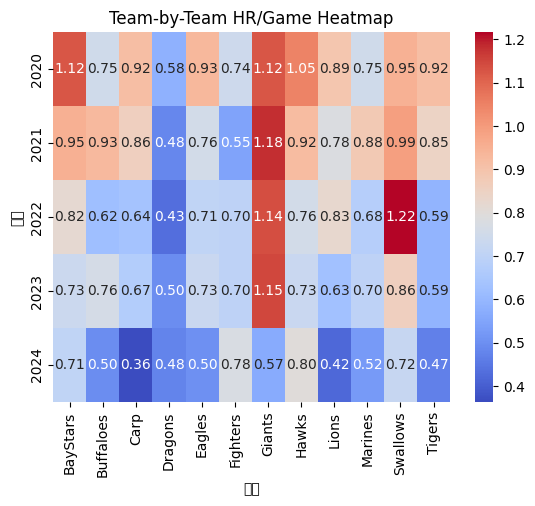

In [106]:
pivot = df.pivot_table(values="本塁打数", index="年度", columns="球団",
                       aggfunc="sum") / df.pivot_table(values="試合数", index="年度", columns="球団", aggfunc="sum")

sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Team-by-Team HR/Game Heatmap")
plt.show()


## 統計的分析



### 年度ごとの平均比較(トレンド確認)
- 指標：1試合平均HR数,OPS,SLG
- 方法：
- 年度ごとの平均値を算出
- ANOVA(分散分析)やt検定で年度間の差を検証


In [107]:
from scipy import stats

# 年度ごとのHR_per_game比較（例: 2020 vs 2024）
df_2020 = df[df["年度"] == 2020]["HR_per_game"]
df_2024 = df[df["年度"] == 2024]["HR_per_game"]

t_stat, p_val = stats.ttest_ind(df_2020, df_2024, equal_var=False)
print("t検定結果:", t_stat, p_val)


t検定結果: 5.150984535188498 3.8304162043356955e-05


## 回帰分析(長期的トレンドの把握)
- 目的：年度が進むごとにHR_per_gameやOPSがどう変化しているかを定量化
- 方法：単回帰 or 重回帰
- 従属変数: HR_per_game
- 独立変数: 年度（2020=0,2021=1…などに変換）

In [108]:
import statsmodels.api as sm

df["年度数値"] = df["年度"] - df["年度"].min()
X = sm.add_constant(df["年度数値"])
y = df["HR_per_game"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            HR_per_game   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     22.87
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           1.23e-05
Time:                        13:38:37   Log-Likelihood:                 20.100
No. Observations:                  60   AIC:                            -36.20
Df Residuals:                      58   BIC:                            -32.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9128      0.039     23.187      0.0

### OPSとHR_per_gameの相関
- 目的：「打者全体の打撃力（OPS）」と「ホームラン率」がどのくらいリンクしているか確認

- 方法：相関係数（ピアソン相関）

In [109]:
corr = df["OPS"].corr(df["HR_per_game"])
print("OPSとHR_per_gameの相関係数:", corr)


OPSとHR_per_gameの相関係数: 0.8547906058195557


### 球団ごとの差の分析

- 指標：HR_per_game, OPS, SLG
- 方法：球団別の平均比較（ANOVA）やランキング
- 例えば「同じ年度でも球団差がどれだけあるのか？」を調べると面白いです。

In [110]:
import statsmodels.formula.api as smf

model = smf.ols("HR_per_game ~ C(球団)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


            sum_sq    df         F    PR(>F)
C(球団)     1.120823  11.0  3.530032  0.001129
Residual  1.385501  48.0       NaN       NaN


## 考察




## ANOVA(分散分析)

対象は「年度ごとの1試合平均HR数（HR_per_game）」


**解釈の目安**

- p < 0.05 → 年度間に統計的に有意な差がある（HR_per_gameの平均が年度によって違う）

- p ≥ 0.05 → 有意差なし（少なくとも統計的には年度間で変化があるとは言えない）



In [111]:
import pandas as pd
from scipy import stats

# Load the yearly summarized data which contains the 'HR_per_game' column
yearly = pd.read_csv("npb_2020_2024_summary.csv")

# Group by year
groups = [yearly[yearly["年度"] == year]["HR_per_game"] for year in sorted(yearly["年度"].unique())]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("ANOVA結果")
print("F値:", f_stat)
print("p値:", p_val)

ANOVA結果
F値: nan
p値: nan


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-2791754235.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(*groups)


### Tukey HSD検定

In [112]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd



# Tukey HSD 検定
tukey = pairwise_tukeyhsd(endog=df["HR_per_game"], groups=df["年度"], alpha=0.05)

print(tukey)

# 結果を表形式で表示
tukey_result = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2020   2021    -0.05 0.9585 -0.2554  0.1554  False
  2020   2022  -0.1345 0.3578 -0.3399  0.0709  False
  2020   2023   -0.166 0.1672 -0.3714  0.0394  False
  2020   2024  -0.3263 0.0004 -0.5317 -0.1209   True
  2021   2022  -0.0845 0.7736 -0.2899  0.1209  False
  2021   2023   -0.116 0.5086 -0.3214  0.0894  False
  2021   2024  -0.2762 0.0033 -0.4816 -0.0708   True
  2022   2023  -0.0315 0.9925 -0.2369  0.1739  False
  2022   2024  -0.1917 0.0783 -0.3971  0.0137  False
  2023   2024  -0.1603 0.1949 -0.3657  0.0452  False
----------------------------------------------------
   group1  group2  meandiff   p-adj   lower   upper  reject
0    2020    2021   -0.0500  0.9585 -0.2554  0.1554   False
1    2020    2022   -0.1345  0.3578 -0.3399  0.0709   False
2    2020    2023   -0.1660  0.1672 -0.3714  0.0394   False
3    2020    2024 

### 回帰分析（年度とHR_per_gameのトレンド）

                            OLS Regression Results                            
Dep. Variable:            HR_per_game   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     22.87
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           1.23e-05
Time:                        13:38:37   Log-Likelihood:                 20.100
No. Observations:                  60   AIC:                            -36.20
Df Residuals:                      58   BIC:                            -32.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9128      0.039     23.187      0.0

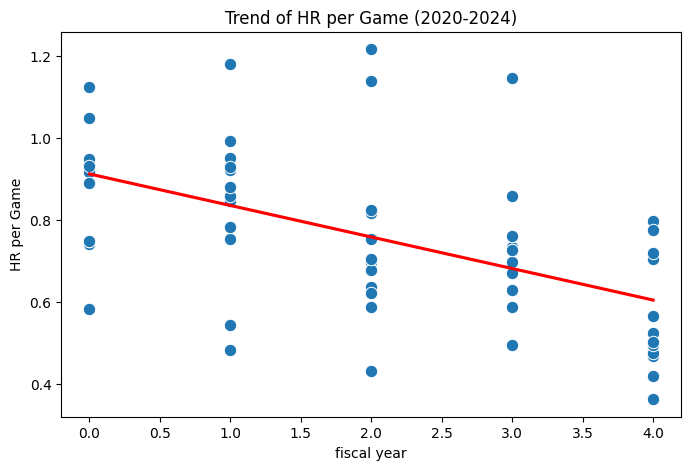

In [113]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# try:
#     mpl.rcParams['font.family'] = 'IPAexGothic'
# except:
#     print("IPAexGothic font not found. Using default font.")
#     mpl.rcParams['font.family'] = 'DejaVu Sans'


# 年度を数値に変換（カテゴリではなく数値でトレンドを見る）
df['year_num'] = df['年度'] - df['年度'].min()

# 回帰モデル作成
X = sm.add_constant(df['year_num'])  # 切片を追加
y = df['HR_per_game']
model = sm.OLS(y, X).fit()

# 回帰結果の概要
print(model.summary())

# 可視化
plt.figure(figsize=(8,5))
sns.scatterplot(x='year_num', y='HR_per_game', data=df, s=80)
sns.regplot(x='year_num', y='HR_per_game', data=df, scatter=False, ci=None, color='red')
plt.xlabel("fiscal year")
plt.ylabel("HR per Game")
plt.title("Trend of HR per Game (2020-2024)")
plt.show()

### 相関係数を確認
OPS・SLGとHR_per_gameがどの程度連動しているかを数値で見ます。



In [114]:
import pandas as pd

# OPSを計算（まだ列がない場合）
df["OPS"] = df["出塁率"] + df["長打率"]

# 相関係数の確認
corr = df[["HR_per_game", "OPS", "長打率", "出塁率"]].corr()
print(corr)


             HR_per_game       OPS       長打率       出塁率
HR_per_game     1.000000  0.854791  0.920500  0.550620
OPS             0.854791  1.000000  0.966285  0.861930
長打率             0.920500  0.966285  1.000000  0.702323
出塁率             0.550620  0.861930  0.702323  1.000000


### 単回帰分析
「HR_per_game を OPSやSLGで説明できるか」を見る。



In [115]:
import statsmodels.api as sm

# HR_per_game ~ OPS
X = sm.add_constant(df["OPS"])
y = df["HR_per_game"]

model_ops = sm.OLS(y, X).fit()
print(model_ops.summary())

# HR_per_game ~ SLG
X = sm.add_constant(df["長打率"])
model_slg = sm.OLS(y, X).fit()
print(model_slg.summary())


                            OLS Regression Results                            
Dep. Variable:            HR_per_game   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     157.3
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           3.65e-18
Time:                        13:38:37   Log-Likelihood:                 49.484
No. Observations:                  60   AIC:                            -94.97
Df Residuals:                      58   BIC:                            -90.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5590      0.265     -9.661      0.0

### 新複数回帰分析（OPS・SLG両方を使う）

OPSはOBP＋SLGなのでやや冗長ですが、参考として複数回帰もできます。

In [116]:
X = df[["長打率", "出塁率"]]
X = sm.add_constant(X)
y = df["HR_per_game"]

model_multi = sm.OLS(y, X).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:            HR_per_game   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           1.49e-25
Time:                        13:38:37   Log-Likelihood:                 70.306
No. Observations:                  60   AIC:                            -134.6
Df Residuals:                      57   BIC:                            -128.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4019      0.243     -5.766      0.0

### 年度ごとのSLG推移グラフ

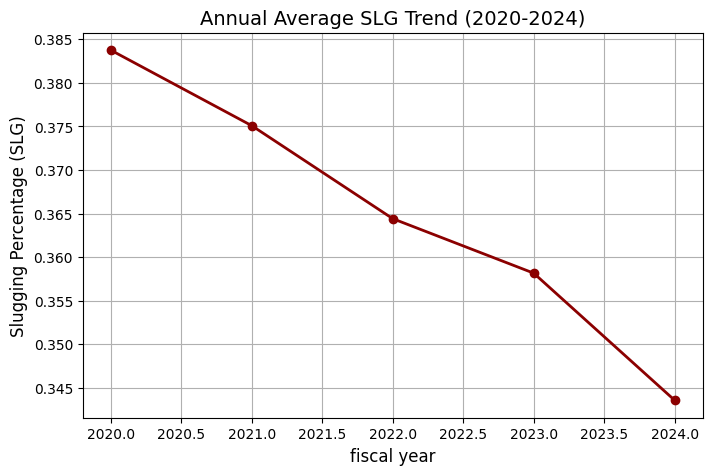

In [117]:
# 年度ごとの平均SLGを計算
slg_trend = df.groupby("年度")["長打率"].mean().reset_index()

# 折れ線グラフを描画
plt.figure(figsize=(8,5))
plt.plot(slg_trend["年度"], slg_trend["長打率"], marker="o", color="darkred", linewidth=2)
plt.title("Annual Average SLG Trend (2020-2024)", fontsize=14)
plt.xlabel("fiscal year", fontsize=12)
plt.ylabel("Slugging Percentage (SLG)", fontsize=12)
plt.grid(True)
plt.show()


### 全体の平均SLGの年度ごとの推移を折れ線グラフ

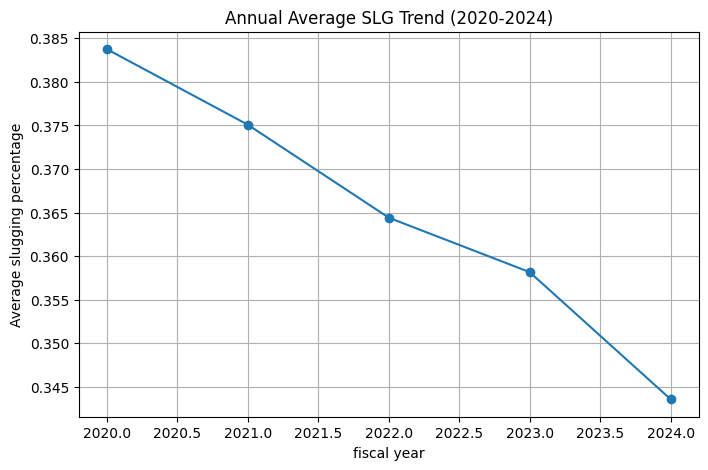

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl



# 年度ごとに平均SLGを計算
slg_trend = df.groupby("年度")["長打率"].mean().reset_index()

# 折れ線グラフを作成
plt.figure(figsize=(8,5))
plt.plot(slg_trend["年度"], slg_trend["長打率"], marker="o", linestyle="-")

plt.title("Annual Average SLG Trend (2020-2024)")
plt.xlabel("fiscal year")
plt.ylabel("Average slugging percentage")
plt.grid(True)
plt.show()

### 「年度ごとの平均SLG」と「移動平均（3年）」

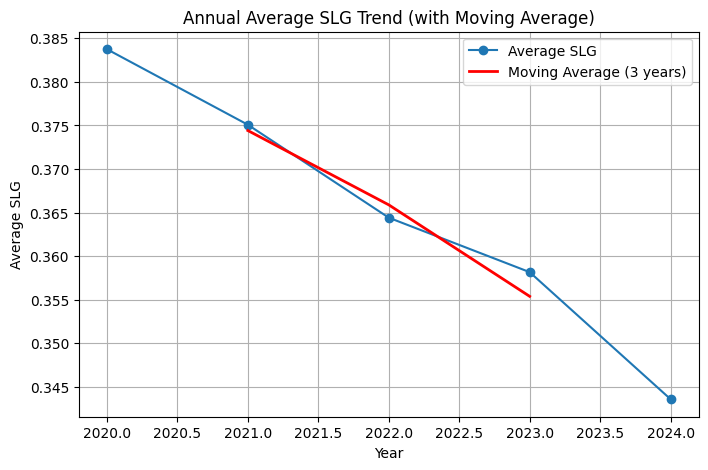

In [119]:
import matplotlib.pyplot as plt

# 年度ごとに平均SLGを計算
slg_trend = df.groupby("年度")["長打率"].mean()

# 移動平均（3年）
slg_trend_ma = slg_trend.rolling(window=3, center=True).mean()

# グラフ描画
plt.figure(figsize=(8,5))
plt.plot(slg_trend.index, slg_trend.values, marker="o", label="Average SLG")
plt.plot(slg_trend_ma.index, slg_trend_ma.values, color="red", linewidth=2, label="Moving Average (3 years)")

plt.title("Annual Average SLG Trend (with Moving Average)")
plt.xlabel("Year")
plt.ylabel("Average SLG")
plt.legend()
plt.grid(True)
plt.show()
